<a href="https://colab.research.google.com/github/djsmacker01/House-Price-Prediction/blob/main/Nurudeen_Adedeji_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
train = files.upload()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import numpy as np #linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import io
# data = pd.read_csv(io.BytesIO(train['train.csv']))
df= pd.read_csv("/content/drive/MyDrive/Data Science Class/house_prices.csv")

In [ ]:
#list out all the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
missing_val = df.isnull().sum()
missing_val

In [ ]:
missing_values_sorted = missing_val.sort_values(ascending=False)

print("Columns with the most missing values:")
print(missing_values_sorted.head(20))

In [ ]:
df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [ ]:
#Separate numercial and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
#imputer for numerical data (using Median)
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [ ]:
#imputer for categorical data (using most frequent value)
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

In [ ]:
#verify there are no more missing values
missing_val = df.isnull().sum()
missing_val

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [ ]:
missing_values_sorted = missing_val.sort_values(ascending=False)

print("Columns with the most missing values:")
print(missing_values_sorted.head(60))

Columns with the most missing values:
Id               0
HalfBath         0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
HeatingQC        0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
CentralAir       0
Heating          0
MSSubClass       0
LandSlope        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
TotalBsmtSF      0
Utilities   

In [ ]:
num_cols = len(categorical_cols)
print(num_cols)

39


In [ ]:
num_rows = (num_cols + 2) // 3
print(num_rows)

13


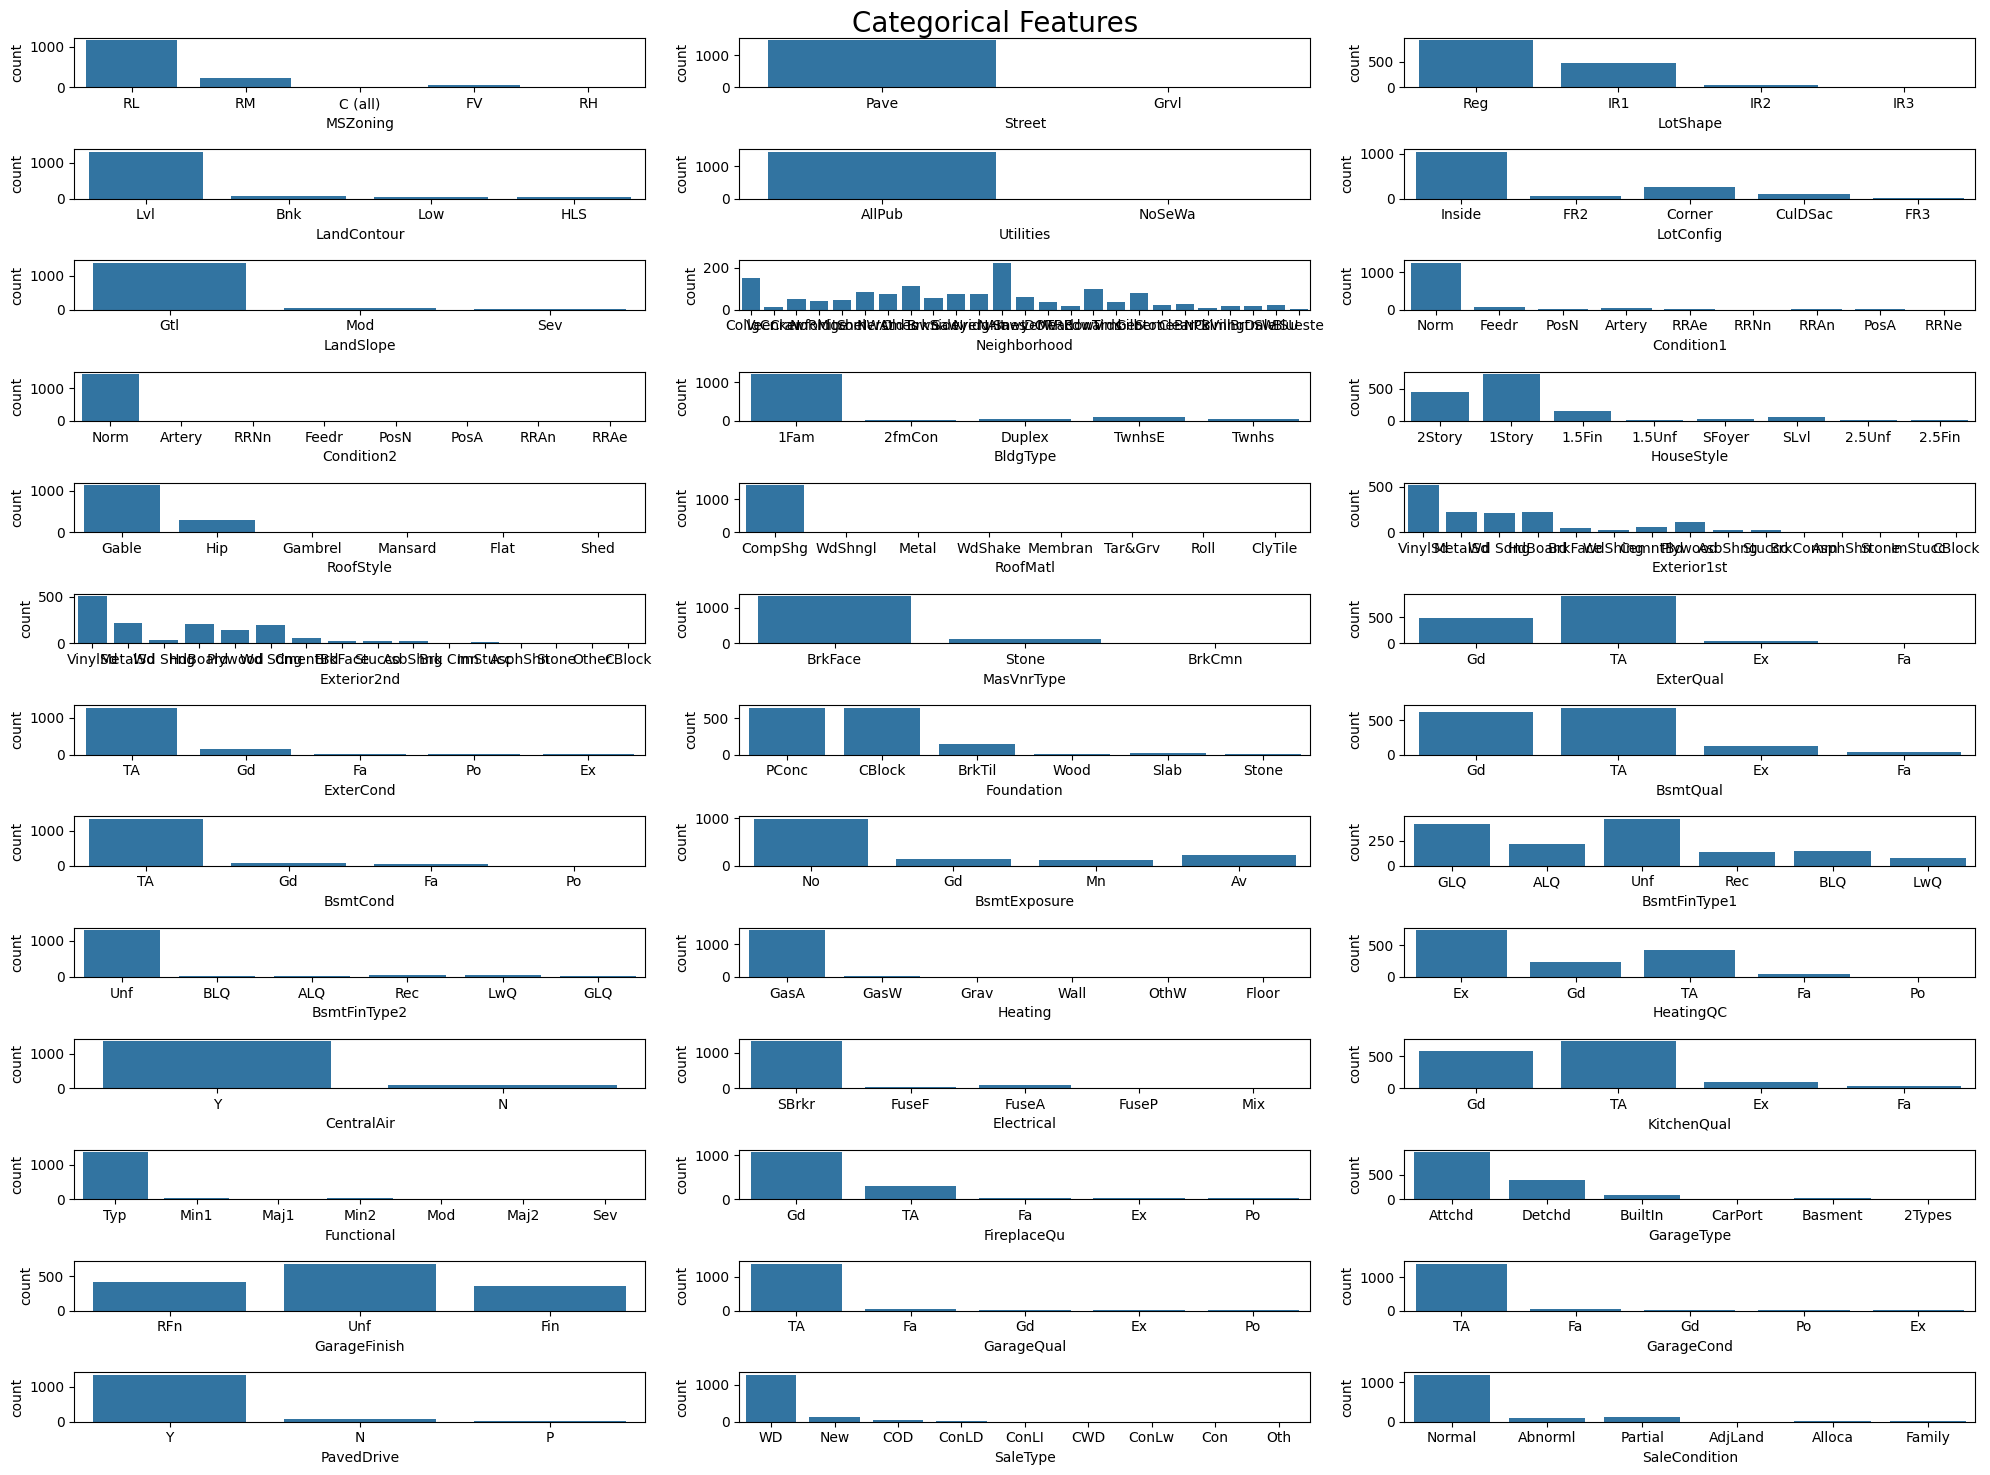

In [ ]:
#Let's move to the next stage, which is EDA,
#Let' start with automatically drawing graphs from all categorical

num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
plt.figure(figsize=(20,15))
plt.suptitle('Categorical Features', fontsize=20)
for i in range(0, len(categorical_cols)):
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(x=categorical_cols[i], data=df)
    plt.tight_layout()

<ipython-input-26-12bcc88cb698>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-26-12bcc88cb698>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-26-12bcc88cb698>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

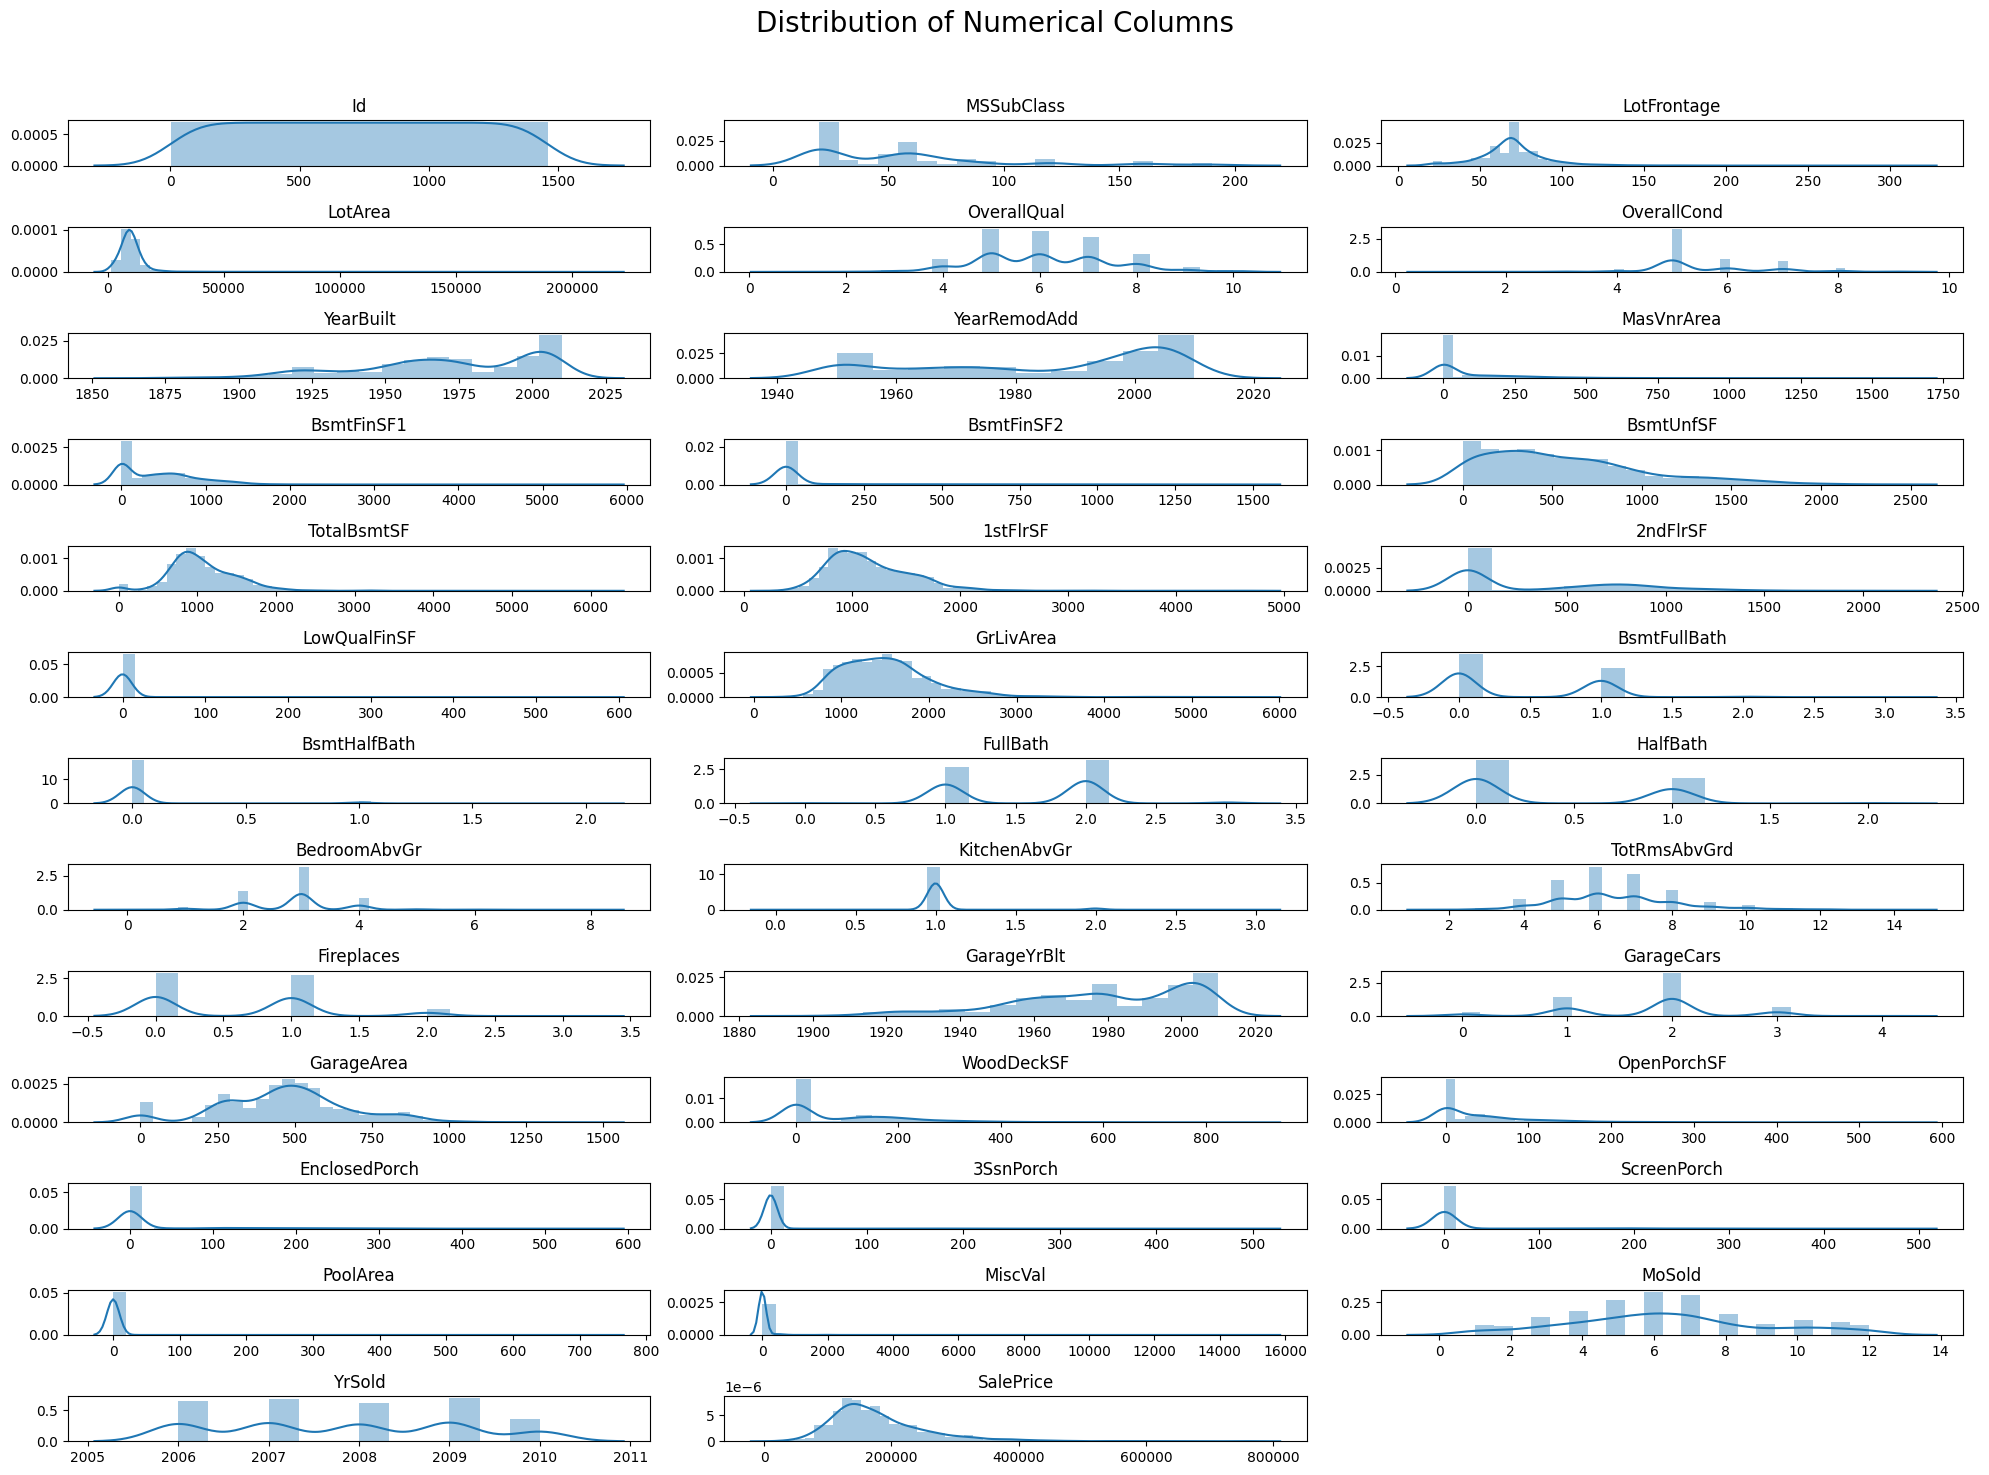

In [ ]:
#Let's move to the next stage, which is EDA,
#Let' start with automatically drawing graphs from all numerical
plt.figure(figsize=(20,15))
plt.suptitle('Distribution of Numerical Columns', fontsize=20)

for i, col in enumerate(numerical_cols, 1):
  plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
  sns.distplot(df[col])
  plt.title(col)
  plt.xlabel('')
  plt.ylabel('')

plt.tight_layout(rect=[0,0,1, 0.96])
plt.show()

In [ ]:
# total square footage of house (including basement)
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# total number of bathrooms (which includes full and half)
df['TotalBath'] = df["FullBath"] + (0.5 * df["HalfBath"]) + df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"])

#Age of the house at the time of sale
df['House'] = df["YrSold"] - df["YearBuilt"]

# Number of years since the house was remodeled
df['YearSinceRemodeled'] = df["YrSold"] - df["YearRemodAdd"]

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df["YearSinceRemodeled"].head()

0     5
1    31
2     6
3    36
4     8
Name: YearSinceRemodeled, dtype: int64

# Encode categorical features using one-hot encoding or label encoding

Handle Outliers
> Identify and hanle outliers in numerical features

Perform Feature scaling
> Do this by Standardizing or Normalizing

Feature Selection
> Select features that are most relevant for the prediction

Train model

Evaluate the model